Summary Insights:
Total Products: 10
Understocked Products: 2
Overstocked Products: 0


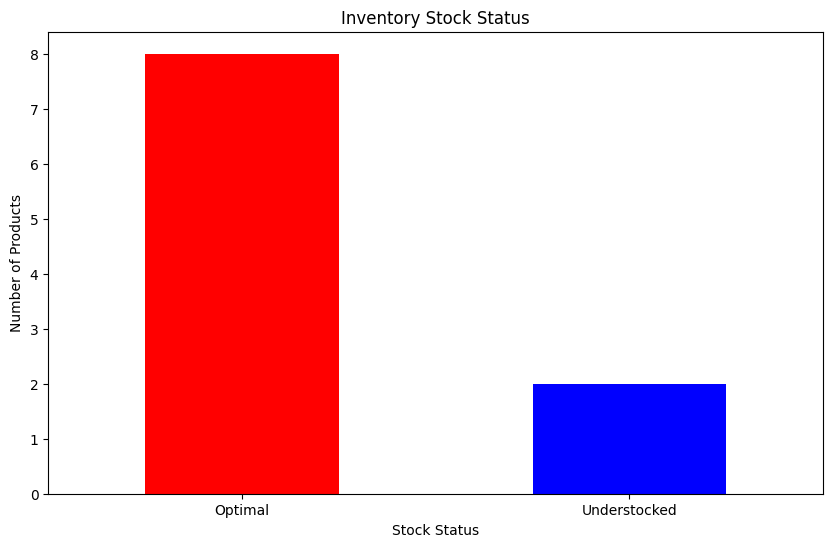

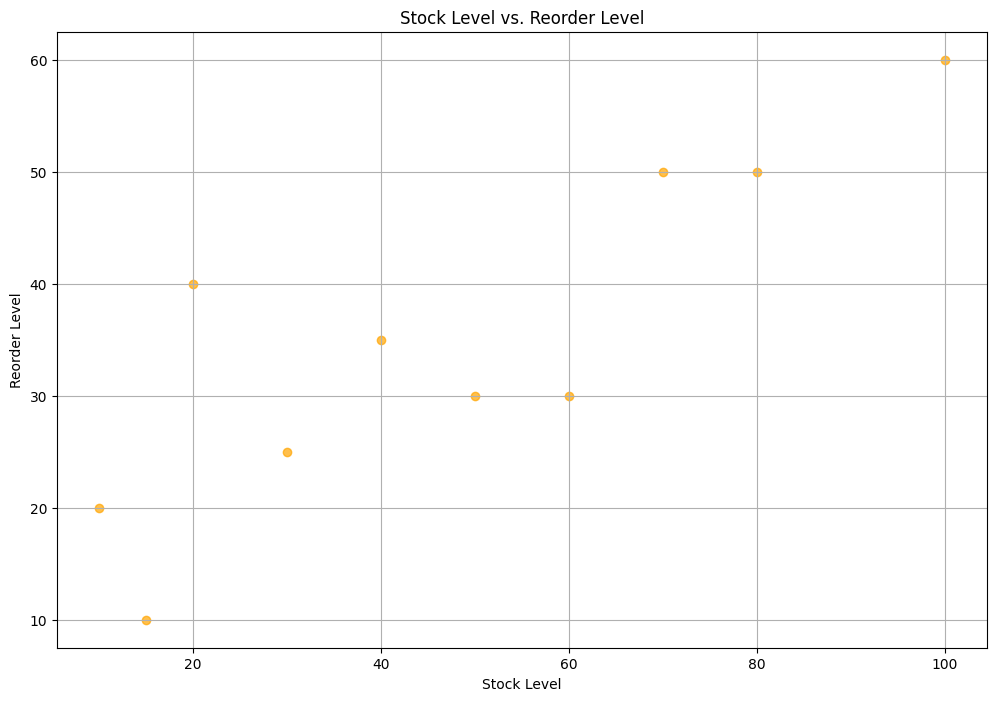

Analysis completed. Results saved to inventory_analysis_results.xlsx


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define inventory data directly as a DataFrame
data = pd.DataFrame({
    "Product ID": ["P001", "P002", "P003", "P004", "P005",
                   "P006", "P007", "P008", "P009", "P010"],
    "Product Name": ["Wireless Mouse", "USB Keyboard", "HDMI Cable",
                     "External Hard Drive", "Laptop Stand", "Wireless Earbuds",
                     "Monitor 24\"", "Gaming Mousepad", "Portable Charger",
                     "Smartphone Holder"],
    "Stock Level": [50, 20, 70, 10, 60, 30, 15, 100, 40, 80],
    "Reorder Level": [30, 40, 50, 20, 30, 25, 10, 60, 35, 50],
    "Sales": [150, 100, 200, 50, 120, 80, 25, 300, 90, 250],
    "Lead Time (Days)": [5, 7, 3, 10, 4, 6, 12, 2, 8, 3],
    "Unit Cost": [10.5, 15.0, 8.0, 75.0, 22.5, 50.0, 120.0, 5.5, 18.0, 12.5],
})

# Clean and preprocess data
data['Stock Level'] = data['Stock Level'].fillna(0)
data['Reorder Level'] = data['Reorder Level'].fillna(data['Reorder Level'].mean())
data['Sales'] = data['Sales'].fillna(0)

# Key metrics
data['Stock Turnover Ratio'] = data['Sales'] / (data['Stock Level'] + 1)  # Avoid division by zero
data['Days of Inventory Outstanding'] = 365 / (data['Stock Turnover Ratio'] + 1)

# Identify understocked and overstocked items
data['Status'] = np.where(data['Stock Level'] < data['Reorder Level'], 'Understocked',
                 np.where(data['Stock Level'] > data['Reorder Level'] * 2, 'Overstocked', 'Optimal'))

# Generate summary insights
understocked_items = data[data['Status'] == 'Understocked']
overstocked_items = data[data['Status'] == 'Overstocked']

print("Summary Insights:")
print(f"Total Products: {len(data)}")
print(f"Understocked Products: {len(understocked_items)}")
print(f"Overstocked Products: {len(overstocked_items)}")

# Visualization
plt.figure(figsize=(10, 6))

# Bar chart for stock status
status_counts = data['Status'].value_counts()
status_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Inventory Stock Status")
plt.ylabel("Number of Products")
plt.xlabel("Stock Status")
plt.xticks(rotation=0)
plt.show()

# Plot Stock Level vs. Reorder Level for all products
plt.figure(figsize=(12, 8))
plt.scatter(data['Stock Level'], data['Reorder Level'], c='orange', alpha=0.7)
plt.title("Stock Level vs. Reorder Level")
plt.xlabel("Stock Level")
plt.ylabel("Reorder Level")
plt.grid(True)
plt.show()

# Export insights to Excel
output_file = "inventory_analysis_results.xlsx"
with pd.ExcelWriter(output_file) as writer:
    data.to_excel(writer, sheet_name="Full Data", index=False)
    understocked_items.to_excel(writer, sheet_name="Understocked Items", index=False)
    overstocked_items.to_excel(writer, sheet_name="Overstocked Items", index=False)

print(f"Analysis completed. Results saved to {output_file}")

